### Hugo Englund | 2020-12-14

# Laboration 5: Part A
### Outline
In this part of the laboration we want to explore the word embeddings of a pretrained ```word2vec``` or ```gensim``` model.

### Load pretrained GloVe model
We explore a pretrained gensim GloVe model, trained on Wikipedia dumps with varying sizes. 

In [ ]:
import gensim.downloader as api

# load pretrained GloVe model
model = api.load("glove-wiki-gigaword-50")  

[==================================================] 100.0% 66.0/66.0MB downloaded


### Visualize the embeddings of the model
Firstly, we visualize the word vectors by a simple table and then check the dimensions of it.

In [ ]:
import pandas as pd

# convert the vocabulary of the model to
# a pandas dataframe
vocab = model[model.vocab]
df = pd.DataFrame(vocab)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,0.278430,-0.147670,-0.55677,0.14658,-0.00951,0.011658,0.102040,-0.127920,-0.84430,-0.121810,-0.016801,-0.332790,-0.155200,-0.231310,-0.191810,-1.8823,-0.76746,0.099051,-0.421250,-0.19526,4.0071,-0.185940,-0.522870,-0.31681,0.000592,0.007445,0.17778,-0.158970,0.012041,-0.054223,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
1,0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,0.130010,-0.063734,-0.39575,-0.48162,0.23291,0.090201,-0.133240,0.078639,-0.41634,-0.154280,0.100680,0.488910,0.312260,-0.125200,-0.037512,-1.5179,0.12612,-0.024420,-0.042961,-0.28351,3.5416,-0.119560,-0.014533,-0.14990,0.218640,-0.334120,-0.13872,0.318060,0.703580,0.448580,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
2,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,0.166080,0.119630,-0.41328,-0.42353,0.59868,0.288250,-0.115470,-0.041848,-0.67989,-0.250630,0.184720,0.086876,0.465820,0.015035,0.043474,-1.4671,-0.30384,-0.023441,0.305890,-0.21785,3.7460,0.004228,-0.184360,-0.46209,0.098329,-0.119070,0.23919,0.116100,0.417050,0.056763,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
3,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,0.078852,-0.362160,-0.11829,-0.83336,0.11917,-0.166050,0.061555,-0.012719,-0.56623,0.013616,0.228510,-0.143960,-0.067549,-0.381570,-0.236980,-1.7037,-0.86692,-0.267040,-0.258900,0.17670,3.8676,-0.161300,-0.132730,-0.68881,0.184440,0.005246,-0.33874,-0.078956,0.241850,0.365760,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
4,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,0.171180,0.224190,-0.10046,-0.43653,0.33418,0.678460,0.057204,-0.344480,-0.42785,-0.432750,0.559630,0.100320,0.186770,-0.268540,0.037334,-2.0932,0.22171,-0.398680,0.209120,-0.55725,3.8826,0.474660,-0.956580,-0.37788,0.208690,-0.327520,0.12751,0.088359,0.163510,-0.216340,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [ ]:
# check the shape of the word vectors
df.shape

(400000, 50)

We can see that each word is represented by a vector with 50 elements, and that we have 400000 words in the vocabulary. 

Further, we can make use of the cosine similarity between vectors from which we can determine if words are related to each other. By computing the principal components (PC) of the word vectors, we can then visualize the vocabulary in a plot. We can expect that similar words are close together, given the context of Wikipedia pages. 

First, we compute the principal components (code from [Medium](https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354)):

In [ ]:
import numpy as np

# computing the correlation matrix
vocab_corr = df.corr()

# computing eigen values and eigen vectors
values, vectors = np.linalg.eig(vocab_corr)

# sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

# taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

# projecting it onto new dimesion with 2 axis
neww_X = np.dot(X,new_vectors)

Second, we make a scatter plot of a sample from the vocabulary based on the PCs and annotate each data point with the corresponding word (code from [Medium](https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354)):

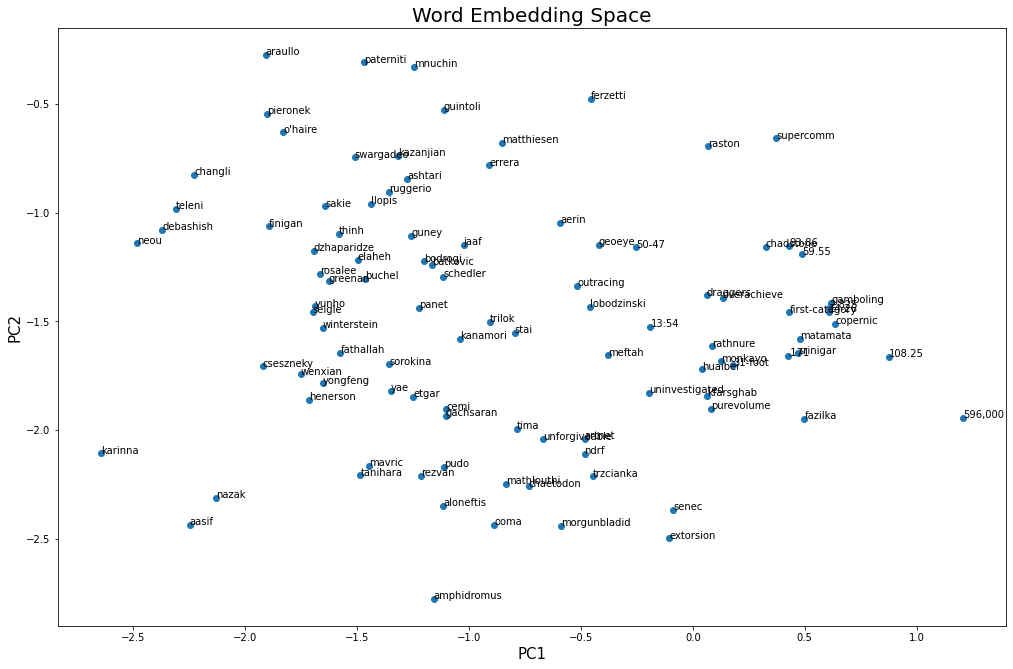

In [ ]:
import matplotlib.pyplot as plt

# generate random starting index of the vocab list
no_of_words = 100
l_idx = np.random.randint(len(model.vocab))
u_idx = l_idx + no_of_words

# plot and annotate the chosen words
plt.figure(figsize=(17, 11))
plt.scatter(neww_X[l_idx:u_idx,0], neww_X[l_idx:u_idx,1])
plt.xlabel("PC1", size=15)
plt.ylabel("PC2", size=15)
plt.title("Word Embedding Space", size=20)

vocab=list(model.vocab)[l_idx:u_idx]
for i, word in enumerate(vocab):
  plt.annotate(word, xy=(neww_X[i+l_idx,0], neww_X[i+l_idx,1]))

### Semantic exploring
Secondly, we explore how we can play with the semantics of the pretrained model. E.g., finding similarities between words as well as solving analogies in form similar pairs of words.

Check similarities for some random words to investigate if we obtain reasonable results. We try to see what we get when calulating:
$$f(science) - f(truth).$$

In [ ]:
# check similar words related to the above expression
model.most_similar(positive=['science'], negative=['truth'], topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('biomedical', 0.6593233942985535),
 ('majoring', 0.6187484264373779),
 ('institutes', 0.6070476174354553),
 ('informatics', 0.6011937856674194),
 ('2950', 0.599973201751709),
 ('humanities', 0.5959763526916504),
 ('aeronautical', 0.5800513625144958),
 ('world-renowned', 0.5792497992515564),
 ('engineering', 0.5781546235084534),
 ('bioinformatics', 0.5760380029678345)]

Based on this, it seems like the biomedical science branch is least correlated to truth based on Wikipedia. Joking aside, the model can produce some funny results.
___


We try to solve the following analogy: 
$$f(trump) - f(usa) = f(?) - f(russia).$$

One would expect that $f(?) = f(putin)$, i.e., Trump is for USA what Putin is for Russia. Let's see what our model thinks:

In [ ]:
# try to solve the above analogy
model.most_similar(positive=['trump', 'russia'], negative=['usa'], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('putin', 0.6635562181472778),
 ('ambitions', 0.6257283687591553),
 ('luzhkov', 0.614799976348877)]

Our model is correct with "Putin"!
___

We explore another fun analogy:
$$f(pasta) - f(italy) = f(?) - f(japan).$$

A reasonable answer would perhaps be $f(?) = f(sushi)$. Let's see:

In [ ]:
model.most_similar(positive=['pasta', 'japan'], negative=['italy'], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('noodles', 0.7392509579658508),
 ('tempura', 0.7368788719177246),
 ('sushi', 0.6883871555328369)]

We got noodles as top 1 which is reasonable as well...

### Summary
We can see that the pretrained model solved the analogies more or less accurately, which is quite fascinating. In part B, we proceed with a bit more complex analysis in form of IMDB movie review classification.
